# EDSA Movie Recommendation Predict

© Explore Data Science Academy​ TeamCW2



<img src="img/film2.webp" style="width: 700px; height: 300px"/>

<a id="cont"></a>
## Table of Contents

<a href=#intro>1.  INTRODUCTION </a>

<a href=#colab>1.  COLLABORATORS </a>

<a href=#one>1.  IMPORTING PACKAGES </a>

<a href=#two>2.  LOADING OF THE DATA </a>

<a href=#three>3.  EDA </a>

<a href=#four>4.  FEATURE ENGINEERING </a>

<a href=#five>5.  FILTERS </a>
<li><a href=#five_one>5.1 CONTENT FILTER
 <li><a href=#five_two>5.2 COLLABORATVE FILTER
     <li><a href=#five_three>5.3 RESULTS
         <li><a href=#five_four>5.3 FILTER SUMMARY

<a href=#six>6.  MODELS </a>
  
<a href=#seven>7.  MODEL PERFORMANCE </a>

<a href=#eight>8.  MODEL EVALUATION </a>

<a href=#nine>9.  CONCLUSION </a>

<a href=#ten>10. REFRENCES </a>

<a href=#eleven>11. APPRECIATION </a>


<a id="intro"></a>
# Introduction


# Recommend movies to users based on content and collaboration!

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of recommending movies to users based on properties of a movies or based on rattings by other users

We're going to take the followeing approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given a list of movies, can we recommend more movies to a user that will interest them?

## Data

GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB 

There is also a version of it available on kaggle. https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/data

## 3. Evaluation

> The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process.


## 4. Supplied Files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the - - links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

## 5. Additional Information
- 1.**Ratings Data File Structure (train.csv)**
    - All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: `userId,movieId,rating,timestamp` Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars). Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

- 2. **Tags Data File Structure (tags.csv)**
    - All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format: `userId,movieId,tag,timestamp`
    
- 3. **Movies Data File Structure (movies.csv)**
    - Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format: `movieId,title,genres`
    - Genres are a pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)
    
- **Links Data File Structure (links.csv)**
    - Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format: `movieId,imdbId,tmdbId`
    
- **Tag Genome (genome-scores.csv and genome-tags.csv)**
    - The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:`movieId,tagId,relevance`

<a href=#cont>Back to Table of Contents</a>

<a id="colab"></a>
## COLLABORATORS

<img src="img/team.gif" style="width: 400px; height: 200px"/>

*Source:* https://i.pinimg.com/originals/d6/0f/63/d60f63f6dd27989ce8756c37f774d309.gif


### Team Members

OLASUNKANMI OYADOKUN - olasunkanmifelix@yahoo.com

Tristan Krafft - tristankrafft08@gmail.com

### Please enter your names and emails here

<a href=#cont>Back to Table of Contents</a>

<a id="one"></a>
## 1. IMPORTING PACKAGES

* These packages includes important library to help us successfully complete our project conveniently

<a href=#cont>Back to Table of Contents</a>

In [118]:
import numpy as np
import pandas as pd
import cufflinks as cf
import re

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

# Libraries for advanced charts
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Libraries for modelling
from surprise import SVD,SlopeOne,SVDpp,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,NMF,CoClustering
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split

#Libraries for reading data the surprise way
from surprise import BaselineOnly, Dataset, Reader, accuracy

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. LOADING OF THE DATA
**Tasks:**
- 1. Import all relevant dataset 
- 2. View the tables to gain insight

<img src="img/loading.gif" style="width: 400px; height: 200px"/>

Source: https://i.stack.imgur.com/hzk6C.gif

<a href=#cont>Back to Table of Contents</a>

In [119]:
# Load our Movies dataset and view first 2 rows
movies = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [120]:
# Load our Tag dataset and view first 2 rows
tag = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/tags.csv')
tag.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [121]:
rates = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/train.csv')
rates.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [122]:
# Check out the numbers of rows and columns of each table
movies.shape, tag.shape, rates.shape

((62423, 3), (1093360, 4), (10000038, 4))

<a id="three"></a>
## 3. EXPLORATORY DATA ANALYSIS (EDA) ON TRAIN DATASET 

<img src="img/eda3.gif" style="width: 400px; height: 200px"/>

**Source:** https://miro.medium.com/max/640/1*oe2FpBsRZj-bmhPJIuP6fw.gif

**Task:** 
- 1. Analyse data statistically to summarize their main characters
- 2. Get more infor about the datastes
- 3. Check the statistical description of the dataset
- 4. Plot graphs to aid visualization of some computations and statistics performed
- 5. Merge tables to aid indepth analysis


<a href=#cont>Back to Table of Contents</a>

In [123]:
# Get more informatioin of the various data types contained in the dataset
rates.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [124]:
# Check for missing values in the dataset
rates.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [125]:
# Check out the statistics of the dataset
rates.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [126]:
rates.skew() # Check the nature of skewness in the data

userId       0.007477
movieId      2.200436
rating      -0.703118
timestamp   -0.017331
dtype: float64

In [127]:
rates.kurtosis() 

userId      -1.197634
movieId      4.351014
rating       0.221102
timestamp   -1.316891
dtype: float64

## Observation from stats
- The data set has `10000038` rows and `4`columns
- The table have all **numeric datatype** namely:
- There are no missing values in the data set
- The sumarry breakdown of statistical description is shown in the table above
- The `rating` and `timestamp` are **moderately negatively skew** while `message` cannot be determine now because it is non numeric datatype
    - The kurtosis indicates lack of outliers in the dataset since it is **< 3** aside the `movieId`
    

In [128]:
#Check statistics of the various sentiments
rates.groupby('rating').describe() 

userId                                                      \
            count          mean           std  min       25%      50%   
rating                                                                  
0.5      157571.0  80494.391481  46122.209914  2.0  41404.00  80328.0   
1.0      311213.0  80914.237037  46772.252582  1.0  39920.00  80501.0   
1.5      159731.0  80847.786910  46944.418891  2.0  39654.00  80511.0   
2.0      656821.0  81360.850541  46908.620509  2.0  40313.00  81028.0   
2.5      505578.0  80813.491950  46720.115842  1.0  39896.00  80018.0   
3.0     1959759.0  81303.320856  46801.843580  1.0  40611.50  80902.0   
3.5     1270642.0  80929.655872  46694.426415  1.0  40036.00  80597.0   
4.0     2652977.0  81266.452488  46794.761580  1.0  40696.00  81017.0   
4.5      880516.0  81317.112657  46864.379190  1.0  40423.75  81216.0   
5.0     1445230.0  81337.436560  46855.348785  1.0  40833.00  81096.5   

                               movieId                ...                     \
              75%       max      count          mean  ...      75%       max   
rating                                                ...                      
0.5     120065.00  162541.0   157571.0  32311.882117  ...  55442.0  208385.0   
1.0     121324.00  162541.0   311213.0  15985.636815  ...   5378.0  209145.0   
1.5     121857.00  162541.0   159731.0  28104.281987  ...  47122.0  208319.0   
2.0     122011.00  162541.0   656821.0  17076.679908  ...   5943.0  208943.0   
2.5     121089.00  162541.0   505578.0  29513.890790  ...  50923.0  209153.0   
3.0     121747.00  162541.0  1959759.0  17112.912121  ...   5883.0  209171.0   
3.5     121147.00  162541.0  1270642.0  30262.105946  ...  52722.0  209135.0   
4.0     121556.00  162541.0  2652977.0  19118.387946  ...   7099.0  209123.0   
4.5     121773.00  162541.0   880516.0  28310.653057  ...  48780.0  209129.0   
5.0     121730.75  162541.0  1445230.0  17686.071820  ...   5971.0  208939.0   

        timestamp                                                          \
            count          mean           std           min           25%   
rating                                                                      
0.5      157571.0  1.338828e+09  1.638090e+08  1.045607e+09  1.176875e+09   
1.0      311213.0  1.143397e+09  2.288222e+08  8.228736e+08  9.612011e+08   
1.5      159731.0  1.312999e+09  1.662392e+08  1.045607e+09  1.150191e+09   
2.0      656821.0  1.161556e+09  2.236559e+08  8.231852e+08  9.746843e+08   
2.5      505578.0  1.315135e+09  1.653999e+08  1.045607e+09  1.153787e+09   
3.0     1959759.0  1.146125e+09  2.370826e+08  8.228736e+08  9.505908e+08   
3.5     1270642.0  1.321483e+09  1.636591e+08  1.045607e+09  1.164998e+09   
4.0     2652977.0  1.188330e+09  2.295280e+08  8.228736e+08  9.768274e+08   
4.5      880516.0  1.324444e+09  1.614744e+08  1.045607e+09  1.171581e+09   
5.0     1445230.0  1.182089e+09  2.440449e+08  7.896520e+08  9.627950e+08   

                                                  
                 50%           75%           max  
rating                                            
0.5     1.396229e+09  1.481438e+09  1.574312e+09  
1.0     1.059928e+09  1.365811e+09  1.574313e+09  
1.5     1.297903e+09  1.471143e+09  1.574314e+09  
2.0     1.108563e+09  1.385333e+09  1.574328e+09  
2.5     1.304208e+09  1.471729e+09  1.574314e+09  
3.0     1.098689e+09  1.378497e+09  1.574327e+09  
3.5     1.320514e+09  1.474143e+09  1.574327e+09  
4.0     1.152661e+09  1.434976e+09  1.574328e+09  
4.5     1.330706e+09  1.473088e+09  1.574327e+09  
5.0     1.132105e+09  1.446700e+09  1.574326e+09  

[10 rows x 24 columns]

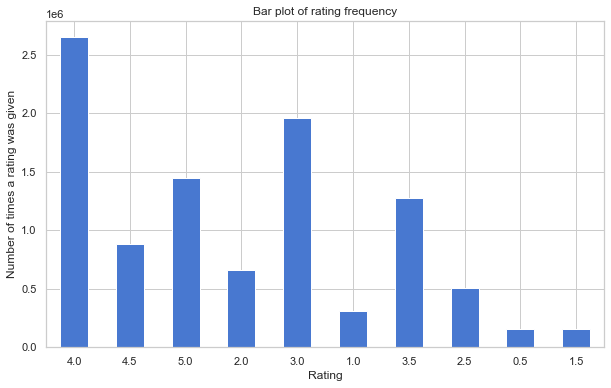

In [129]:
rates['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(rates['rating'].value_counts(sort=False))


The bar plot indicates that the three most common ratings used are 4.0, 5.0 and 3.0. This means that most reviews are relatively positive and this can skew recommendations as most ratings end up being highly positive. This may indicate that a collaborative model may not be as useful as a content based model as content based models don't rely on ratings but rather shared characteristics of different items (such as genre for movies). The order of most common ratings is depicted in the dataframe produced below:

In [130]:
pd.DataFrame(rates.rating.value_counts())

,rating
4.0,2652977
3.0,1959759
5.0,1445230
3.5,1270642
4.5,880516
2.0,656821
2.5,505578
1.0,311213
1.5,159731
0.5,157571


Furthermore, the above chart and table is an indication that there are some qualitative movies in our data base that will be good to recommend to users since the most rated movies lies between 3.0 and 5.0. 

We'll make a copy of the rates dataset to preserve the original data:

In [131]:
# Make copy of the database in order to have what to fall back to in events of messing up our data
ratings = rates.copy()
ratings.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


We will merge the movie table with ratings table, this is done to give us insight into specific movies that are highly rated by users

In [132]:
# Create a mixed datafram of movies title, genres and all user ratings given to each movie
movies_ratings = pd.merge(movies, ratings, on='movieId', how='left')

In [133]:
movies_ratings.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849.0,5.0,994716786.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203.0,5.0,942683155.0


In [134]:
# Computing movies with high ratings

avg_highly_rated_movies = movies_ratings.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies.head()

,rating
title,
Which Way Home (2009),5.0
Kaakha Kaakha (2003),5.0
Not Quite Human II (1989),5.0
Selling Isobel (2018),5.0
Sehar (2005),5.0


In the table above, we can see various movies with  star ratings.

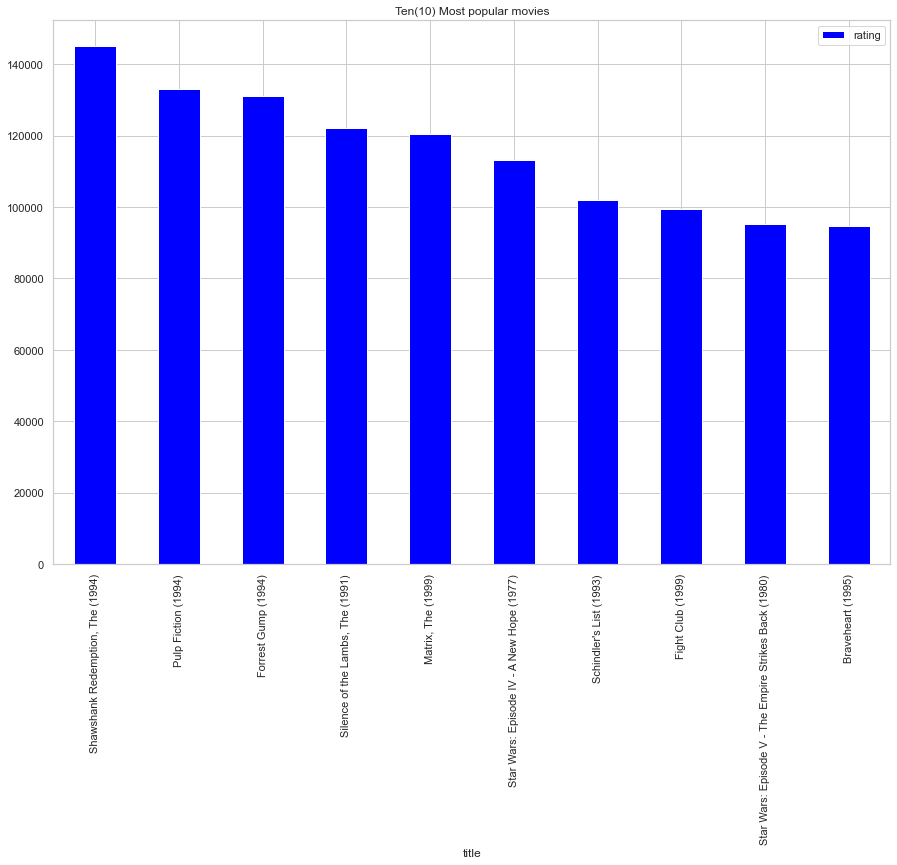

In [135]:
# Computing popular movies

popular_movies = movies_ratings.groupby(['title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)
popular_movies = popular_movies.to_frame()
popular_movies.head(10).plot(kind="bar", color=["blue"], title='Ten(10) Most popular movies');

Now we can tell the number of rates by specific movies, this gives us titles of movies we can recommend to users based on the amount of rates by users

In [136]:
# Computing popular movies watched by over 400 users 
popular_movies.reset_index(level=0, inplace=True)


In [137]:
popular_movies.columns = ['title', 'Number of Users watched']

In [138]:
popular_movies[popular_movies['Number of Users watched'] >= 400]

,title,Number of Users watched
0,"Shawshank Redemption, The (1994)",145035.0
1,Pulp Fiction (1994),132972.0
2,Forrest Gump (1994),131061.0
3,"Silence of the Lambs, The (1991)",122021.0
4,"Matrix, The (1999)",120531.5
...,...,...
6678,21 and Over (2013),400.5
6679,Staying Alive (1983),400.5
6680,"Iceman, The (2012)",400.5
6681,Anatomy (Anatomie) (2000),400.0


**Note:** For a new user registered to our system, these can be good movies to recommend to them

## Distribution by Rating

In [139]:
data = rates['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x=data.index,
              text=['{:.1f} %'.format(val) for val in (data.values / rates.shape[0] * 100)],
              textposition='auto',
              textfont=dict(color='#000000'),
              y = data.values,
              )
# Create layout
layout = dict(title = 'Distribution of {} movie-ratings'.format(rates.shape[0]),
             xaxis = dict(title = 'Rating'),
             yaxis = dict(title = 'Count'))
# Create Plot

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

From the chart, 26.5% ratings belonged to 4.0, while 3.0 had 19.6%. **Highest ratings to lowest:** `4.0,3.0,5.0,3.5,4.5,2.0,2.5,1 and 0.5 and 1.5`

## Ratings Distribution by MovieId

In [140]:
# Number of ratings by movie_id
data = rates.groupby('movieId')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x=data.values,
                     name='Ratings',
                     xbins = dict(start=0,
                                 end=50,
                                 size=2))

# Create layout
layout = go.Layout(title = 'Distribution of Number of Ratings per movie (Clipped at 100)',
             xaxis = dict(title = 'Number of Ratings Per Movie'),
             yaxis = dict(title = 'Count'),
             bargap=0.2)
# Create Plot

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [141]:
rates.groupby('movieId')['rating'].count().reset_index().sort_values('rating',ascending=False)[:10]

,movieId,rating
314,318,32831
351,356,32383
292,296,31697
585,593,29444
2479,2571,29014
257,260,27560
475,480,25518
522,527,24004
108,110,23722
2866,2959,23536


Some movies received ratings less than 3, although the most rated move has received 32,831 ratings

## Ratings Distributio By UserId

In [142]:
# Number of ratings by movie_id
data = rates.groupby('userId')['rating'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x=data.values,
                     name='Ratings',
                     xbins = dict(start=0,
                                 end=50,
                                 size=2))

# Create layout
layout = go.Layout(title = 'Distribution of Number of Ratings per usr (Clipped at 100)',
             xaxis = dict(title = 'Number of Ratings Per User'),
             yaxis = dict(title = 'Count'),
             bargap=0.2)
# Create Plot

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [143]:
rates.groupby('userId')['rating'].count().reset_index().sort_values('rating',ascending=False)[:10]

,userId,rating
72314,72315,12952
80973,80974,3680
137292,137293,3588
33843,33844,3208
20054,20055,3050
109730,109731,2671
49402,49403,2670
92045,92046,2579
110970,110971,2288
30878,30879,2284


Most users rated from 3.0 and above, and few othrs rated for three below

To present our users with best ratings and avoid runing into problems with memory allocations, we will filter out books with low and average ratings rating

<a id='four'></a>
## FEATURE ENGINEERING

<img src="img/feature_Engineering.gif" style="width: 400px; height: 200px"/>

**Source:**https://miro.medium.com/max/720/1*7w7c8yS70eHR74qgBJJu8Q.gif

**Tasks:**
- 1. Remove unwanted character in tables and replace with white space
- 2. Merge tables together
- 3. Filter movies with low ratins and maintain only movies with very high ratings. This is done in order to recommend only quality movies to users and also to help us overcome the problem with memory allocation when we convert our data to sparse matrixs for content and collaborative filtering
- 4. Drop unwanted colums

<a href=#cont>Back to Table of Contents</a>

In [144]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [145]:
# Remove the vertical lines that separates the genres in the genre's column
movies['genres'] = movies['genres'].str.replace('|',' ')

In [146]:
#check to confirm change
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy


In [147]:
movies['genres'].loc[0]

'Adventure Animation Children Comedy Fantasy'

In [148]:
# compare length of unique movieId of ratings and movie table 
len(movies.movieId.unique()), len(ratings.movieId.unique())

(62423, 48213)

In [149]:
#check the difference in uniqueness in movieId between the two tables
len(ratings.movieId.unique()) - len(movies.movieId.unique())

-14210

In [150]:
#ratings.groupby('movieId').count()

In [151]:
# movieId = ratings.groupby(['movieId']).agg({"rating":"sum"})['rating'].sort_values(ascending=True)
# movieId

In [152]:
ratings.groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,23062,23062,23062
2,9654,9654,9654
3,4727,4727,4727
4,968,968,968
5,4648,4648,4648
...,...,...,...
209145,1,1,1
209153,1,1,1
209159,1,1,1


In [153]:
# Maintain ratings that >= 255 movies
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 400) #was 400 instead of 1

# Check out movie titles that makes the list of 55 or more ratings
movie_list_rating = ratings_f.movieId.unique().tolist()

# Drop unwanted colums
ratings_f.drop(['timestamp'],1, inplace=True)

App_ratingsdata = ratings_f.sample()
ratings_f.to_csv('file_name.csv')

**Note:** To avoid problems with insufficient memory allocation for collaborative filtering, we shall be filtering off any movies with ratings less than 400, although this will lead to filtering off lots of movies, but it will afford us more processing time and usability of our hardware systems.

In [154]:
# Chech out new lenth and compare with all movies
len(ratings_f), len(ratings)

(1677256, 10000038)

In [155]:
# Compute number of movis removed
removed_movies = len(ratings) - len(ratings_f)
removed_movies

8322782

`7103863` movies did not make the list

In [156]:
# Compute percentage of movies remaining
len(ratings_f.movieId.unique())/len(ratings.movieId.unique()) * 100

90.73901229958724

Approximately 90% of our data are left

In [157]:
# Percentage of users left
len(ratings_f.userId.unique())/len(ratings.movieId.unique()) * 100

5.546221973326696

We still have almost 100% of our users intact

In [158]:
# filter the movie data frame
movies = movies[movies.movieId.isin(movie_list_rating)]

In [159]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy


In [160]:
# Map movie to id:
#Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [161]:
#Mapping_file

In [162]:
# Drop unwanted colums
#tag.drop(['timestamp'],1, inplace=True)
#ratings_f.drop(['timestamp'],1, inplace=True)

KeyError: "['timestamp'] not found in axis"

#### Merge the movies and the tag data frame and create a metadata tag for

- we do this to give users better content based recommendations

In [ ]:
# Create a mixed datafram of movies title, genres and all user tags given to each movie
mixed = pd.merge(movies, tag, on='movieId', how='left')
mixed.head(2)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,791.0,Owned,1.515175e+09
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1048.0,imdb top 250,1.172144e+09


In [ ]:
# Create metadata from tags genres
mixed.fillna('', inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies, mixed, on='movieId', how='left')
Final['metadata'] = Final[['tag', 'genres']].apply(
lambda x: ' '.join(x), axis=1)

Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji (1995),Robin Williams time travel fantasy based on ch...
2,3,Grumpier Old Men (1995),funny best friend duringcreditsstinger fishing...


In [ ]:
Final.shape

(43748, 5)

<a id="five"></a>
## 5 FILTERS

<img src="img/filter.gif" style="width: 400px; height: 200px"/>

One of the ideas of content filtering is to handle `cold  cold start problems` this is important when a user is new to a system or when an movie has not been viewed or clicked by any one

#### tf-idf vectors and truncated SVD:

<a href=#cont>Back to Table of Contents</a>

<a id="five_one"></a>
## 5.1 Creating a Content latent matrix:

<a href=#cont>Back to Table of Contents</a>

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
# print(tfidf_df.shape)

In [50]:
tfidf_matrix.shape

(43748, 34531)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(Final['metadata'])
#indices = pd.Series(data['title'])
#cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [52]:
count_matrix.shape

(43748, 34788)

As observed, the dimension of the sparse matrix iis too large, hence we reduce its dimension using the SVD matrix

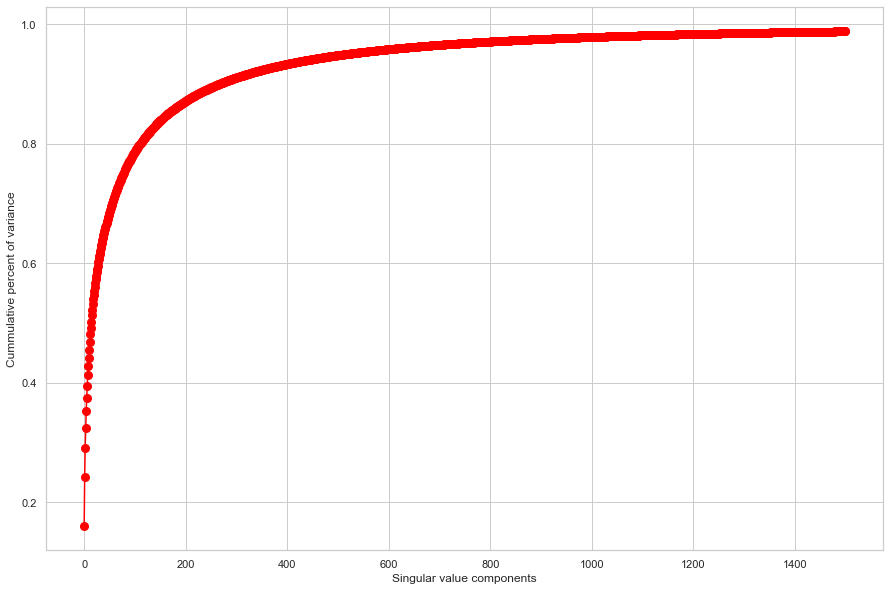

CPU times: total: 1min 51s
Wall time: 53.2 s


In [53]:
%%time
#Since the data is too lager to be computed by my computer, we reduce its dimension using SVD
from sklearn.decomposition import TruncatedSVD
svd  = TruncatedSVD(n_components=1500)
latent_matrix = svd.fit_transform(count_matrix)
latent_matrix_1_df = pd.DataFrame(latent_matrix,index=Final.title.tolist())

# plot variance to see what latent dimension to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cummulative percent of variance', fontsize=12)
plt.show()

the graph above means for a chosen latent feature of 300, about 45% variance is explained by these features 

**Note:** 200 was chosen to help manage the limited computer resources available for this work

In [54]:
latent_matrix_1_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
Toy Story (1995),17.334449,-12.480811,20.422182,-1.390063,-13.871503,17.979912,-3.672782,13.951073,-14.726215,-1.857082,...,0.089663,0.14369,0.078551,-0.046258,0.237609,-0.093195,0.038638,-0.33311,-0.961073,-0.211141


In [55]:
latent_matrix_1_df.shape

(43748, 1500)

<a id='five_two'></a>
## 5.2 Creating a Collaborative latent matrix for ratings:

<a href=#cont>Back to Table of Contents</a>

In [56]:
ratings_f.head()

,userId,movieId,rating
3,106362,32296,2.0
10,40858,5025,3.5
12,6063,33493,3.0
21,95075,41571,3.0
25,146347,1129,4.0


In [57]:
ratings_f.shape

(1677256, 3)

In [58]:
movies.shape

(43748, 3)

In [163]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on='movieId',how='right')

In [164]:
ratings_f1.shape

(1677256, 3)

In [165]:
ratings_f1.head(1)

,movieId,userId,rating
0,32296,106362,2.0


In [166]:
ratings_f2 = ratings_f1.pivot(index='movieId', columns='userId', values='rating').fillna(0)
ratings_f2.to_csv('ratingsf2.csv')

In [63]:
ratings_f2.shape

(43748, 2674)

The dimension of the matrix is still too large, hence we will apply `dimension reduction technique as was done with the content based filtering`  

In [64]:
len(ratings_f.movieId.unique())

43748

In [65]:
%%time
# Dimension reduction using svd
svd = TruncatedSVD(n_components=900)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2,index=Final.title.tolist())

CPU times: total: 3min 45s
Wall time: 1min 16s


In [66]:
latent_matrix_2_df.shape

(43748, 900)

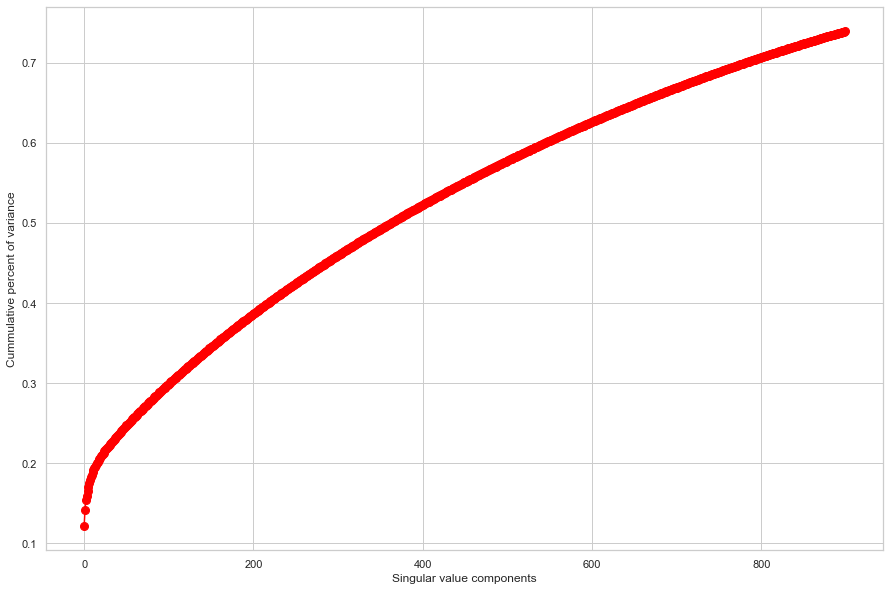

In [67]:
# plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cummulative percent of variance', fontsize=12)
plt.show()

the graph above means for a chosen latent feature of 300, about 40% variance is explained by these features 

**Note:** 200 was chosen to help manage the limited computer resources available for this work

<a id="five_three"><a/>
    
## 5.3 RESULTS: Comparing Content Vs Collaborative Vd Hybrid Using Cosine Similarity

<a href=#cont>Back to Table of Contents</a>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# take the latent vectors for a selected movie from both content and collaboorative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1, -1)

# Calculate the similarity of the movies with others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# combine content and collaborative for hybrid filter
hybrid = ((score_1 + score_2) /2.0)

# form a data frame of similar movies
dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid': hybrid}
#similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)

# Sort the vrious metrics used
# similar.sort_values('content', ascending=False, inplace=True)

# similar[1:].head(11)

In [ ]:
#Content filter
content_similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)
content_based = content_similar.sort_values('content', ascending=False, inplace=True)
content_similar[1:].head(11)

In [ ]:
#Colla
collaborative_similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)
collaborative_based = collaborative_similar.sort_values('collaborative', ascending=False, inplace=True)
collaborative_similar[1:].head(11)

In [ ]:
hybrid_similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)
hybrid_based = hybrid_similar.sort_values('hybrid', ascending=False, inplace=True)
hybrid_similar[1:].head(11)

In [ ]:
pickle.dump(content_based,open('content_algo.pkl', 'wb'))
pickle.dump(content_similar,open('content_similar.pkl', 'wb'))

pickle.dump(collaborative_based,open('collaborative_algo.pkl', 'wb'))
pickle.dump(collaborative_similar,open('collaborative_similar.pkl', 'wb'))

pickle.dump(hybrid_based,open('hybrid_algo.pkl', 'wb'))
pickle.dump(hybrid_similar,open('hybrid_similar.pkl', 'wb'))

pickle.dump(Final,open('movie_list.pkl','wb'))

<a id="five_four"><a/>
## 5.4 SUMMARY

- The Content based scored better than the collaborative because aside filtering off movies with ratings above 250, we also had about 40% variance of our data explained by a latent feature of 300, while about 50% was explained by 300 features for our content based
    
**Performance Score:**
    - 1. for content base the highest performane was approximately 92% and the least(`10th recommendation`) was 67%
    - 2. for collaborative, the highest performane was approximately 61% and the least(`10th recommendation`) was 55%
    - 3. 1. for hybrid, the highest performane was approximately 76% and the least(`10th recommendation`) was 61%

<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. MODELS

<img src="img/machine-learning-libraries.gif" style="width: 400px; height: 200px"/>

**Source:** https://liwaiwai.com/wp-content/uploads/2021/03/machine-learning-libraries.gif

<a href=#cont>Back to Table of Contents</a>

Most users rated from 3.0 and above, and few othrs rated for three below

To present our users with best ratings and avoid runing into problems with memory allocations, we will filter out books with low and average ratings

In [ ]:
min_movie_ratings = 200
filter_movies = rates['movieId'].value_counts() > min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 100
filter_user = rates['userId'].value_counts() > min_user_ratings
filter_user = filter_user[filter_user].index.tolist()

rates_new = rates[(rates['movieId'].isin(filter_movies)) & (rates['userId'].isin(filter_user))]

print('The Original data frame shape:\t{}'.format(rates.shape))
print('The new data frame shape:\t{}'.format(rates_new.shape))

We will filter movies less than `500` ratings and users with less than `500` ratings this will leave us with only very `highly rated movies` that have been rated by `many users`, this will  promote an `effective collaborative filtering` and rich `content based filtering`. Also, this values is chosen to help deal with proplem of memory allocation when converting our data into sparse matrix. This will also help manage our computation speed

 We shall use the **surprise library** to follow along `pip install scikit-surprise`. We will load our data by using the `load_from_df()` function. We will also need the `Reader Object` which is used to parse a file containing ratings and the `rating_scale`The rating scale used for every rating. Default is (1, 5). parameter must be specified.  Such a file is assumed to specify only one rating per line, and each line needs to respect the following structure:

user ; item ; rating ; [timestamp]

**Source:**https://surprise.readthedocs.io/en/stable/reader.html

In [68]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(rates[['userId','movieId','rating']], reader) #was rates_new

#### Modelling 

We Shall consider the folowing algorithms 

**1. Basic Algorithm**
- **NormalPredictor:** This predicts a random rating based on the distribution of the training set which is assumed to be normal
    
**2. BaselineOnly:** This predicts the baseline estimate for given user and movie 
- **KNN Basic:** This is a basic collaborative filtering algorithm
- **KNNWithMeans:** This is also basic but takes account of the mean atings of each user
- **KNNBaseline:** This takes account into a baseline rating
- **KNNWithZScore:** is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user
- 

**3. Matrix Factorization-based algorithms**
- **SVD algorithm:** is equivalent to Probabilistic Matrix Factorization
- **SVDpp algorithm:** is an extension of SVD that takes into account implicit ratings.
- **NMF:** is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.
- **SlopeOne:** is a straightforward implementation of the SlopeOne algorithm.
- **Coclustering:** is a collaborative filtering algorithm based on co-clustering.

We use **`rmse`** as our accuracy metric for the predictions.

**Source:** https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b

In [ ]:
%%time

# SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(),KNNBasic(),SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
# pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    


<a id="seven"></a>
## 7. MODEL EVALUATION

<img src="img/performance.gif" style="width: 400px; height: 200px"/>

**Source:** https://i.pinimg.com/originals/04/8a/51/048a51831e45b04321af593612a04a16.gif

<a href=#cont>Back to Table of Contents</a>

In [ ]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

#### Model Evaluation

After initially experementing on 10 different algorithms including
- SVD()
- SVDpp()
- SlopeOne()
- NMF()
- NormalPredictor()
- KNNBaseline()
- KNNBasic()
- KNNWithMeans()
- KNNWithZScore()
- BaselineOnly()
- CoClustering()]:

After a `CPU times: total: **1h 41min 37s**` and 
`Wall time: **1h 44min 36s**` The SVDpp performed better but with a greater CPU time followed by the SVD algorithm.

**Note:** for the purpose of computation time, we will focus on the SVD algorithms

<a id="eight"></a>
## 8. MODEL PERFORMANCE

<img src="img/performance.gif" style="width: 400px; height: 200px"/>

**Sorce:** https://miro.medium.com/max/1400/1*f-k9vMJGKqctXjvO8dM-UQ.gif
<a href=#cont>Back to Table of Contents</a>

#### Train and Predict

**SVD** algorithm gave us the best rmse, therefore, we will train and predict with **SVD**

In [69]:
%%time
trainset, testset = train_test_split(data, test_size=0.20, random_state=42)
algo = SVD()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.8330
CPU times: total: 2min 26s
Wall time: 2min 43s


0.8330246889331997

# Kaggle submission 

In [70]:
dftest = pd.read_csv('C:/Users/trist/OneDrive/Explore/Course/Unsupervised Learning/Predict/test.csv')

In [ ]:
dftest.head(2)

In [71]:
dftest.loc[:, 'rating'] = 0
dftest.head()

,userId,movieId,rating
0,1,2011,0
1,1,4144,0
2,1,5767,0
3,1,6711,0
4,1,7318,0


In [72]:
%%time
#using load_from_df surprise function to load dataset for predictions
test_processed = Dataset.load_from_df(dftest[['userId','movieId','rating']], reader)

#Train test split, test size will be equal to 1.
NA, test = train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)

#Prediction 
predictions = algo.test(test)

CPU times: total: 43 s
Wall time: 51.2 s


In [73]:
#saving the predictions as a list to add as a column for our Kaggle submission
ratings = [i.est for i in predictions]
ratings

[3.025552764396281,
 4.116539808483402,
 3.573795920954222,
 4.018098825890729,
 2.974238930393336,
 3.6687051524695224,
 4.008352248084106,
 3.6106336367481813,
 3.7504441124875827,
 4.134455030281745,
 3.4843273561667347,
 2.8932836799822597,
 3.888122589135838,
 4.658604635338906,
 4.033973843804406,
 3.6669235387823593,
 3.5117391043702706,
 2.9566921342693804,
 3.639559400249514,
 3.135465103863,
 3.969259723292897,
 3.8145874223617824,
 2.893823268828615,
 2.867553226309893,
 3.885851110766392,
 3.5108092134812505,
 3.801510824934354,
 3.504274542781246,
 3.631313436789638,
 3.4440992502648635,
 4.103604798545819,
 3.2629322104251646,
 3.476005697934835,
 3.4806298270156946,
 2.9093461680880255,
 3.4893381822533924,
 3.476593457981692,
 3.62404191650067,
 4.776770453052325,
 3.2404070089921277,
 3.9845059182793805,
 3.5309822891140903,
 4.183278688073685,
 3.495397513526339,
 4.252713636783872,
 3.654435180808452,
 4.166558628175788,
 4.424747762584688,
 4.042035078429051,
 4.432

In [74]:
dftest['Id'] = dftest['userId'].astype(str)  + '_'+ dftest['movieId'].astype(str) 

In [75]:
#change rating column
dftest['rating'] = ratings
del dftest['userId']
del dftest['movieId']

In [76]:
dftest['R'] = dftest['rating']
del dftest['rating']

In [77]:
dftest['rating'] = dftest['R']

In [78]:
del dftest['R']

In [79]:
dftest

,Id,rating
0,1_2011,3.025553
1,1_4144,4.116540
2,1_5767,3.573796
3,1_6711,4.018099
4,1_7318,2.974239
...,...,...
5000014,162541_4079,3.382180
5000015,162541_4467,3.475556
5000016,162541_4980,2.604471
5000017,162541_5689,3.026069


In [80]:
dftest.to_csv('SVDSubmissionCW2.csv', index = False)

# End Kaggle submission

#### Hyper parameter tunning with GridsearchCV

In [ ]:
%%time
param_grid = { "n_epochs" : [20,30], "lr_all" : [0.005, 0.010], "n_factors" :[50,100]}
# param_grid = {"n_epochs": [20, 30], "lr_all": [0.005, 0.010], "reg_all": [50, 100]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse"], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

Clustering is a UML process that learns directly from the data rather labeled examples. Its objective is to reduce the sum of distance between the center of the cluster and other data points. 

In [ ]:
import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Import KMeans model
from sklearn.cluster import KMeans
# Import time to measure algorithm runtime 
from time import time

Befor we cluster our data, we need to standerdize the data. This is necessry because of data contains features have been measured in different units and have their own ranges. Some features may therefore hav more influenc on the data than others. To reduce this impact, we need to take  each feature and subtract the mean of that feature from each value and then divide it by the feature standard deviation.

In [ ]:
scaler = StandardScaler()
rates_new[['userId_T','movieId_T','rating_T','timestamp_T']] = scaler.fit_transform(rates_new[['userId','movieId','rating','timestamp']])
rates_new

In [ ]:
#Create function to work out optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [ ]:
optimise_k_means(rates_new, 10)

In the above plot, we see the inertia(sum of the squared distances to the nearest cluster center)decreases as we increase the numbers of clustrs. We can csee that three are big changes in inertia and slope 2 onwards

## Applying KMeans Clustering

In [ ]:
# We take our number of clusters as 3 
kmeans = KMeans(n_clusters=3)
#Fir our data to the clusters
kmeans.fit(rates_new)
KMeans(n_clusters=3)

In [ ]:
#Create a column called clusters in order to view the cluster each features belongs
rates_new['clusters'] = kmeans.labels_
rates_new

In [ ]:
plt.scatter(x=rates_new['userId'], y=rates_new['movieId'], c=rates_new['clusters'])

## Creating Multiple Clusters

In [ ]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(rates_new)
    rates_new[f'clusters_{k}'] = kmeans.labels_ 

In [ ]:
rates_new.head()

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

# for i, ax in enumerate(fig.axes, start=1):
#     ax.scatter(x=rates_new['userId'], y=rates_new['movieId'], c=rates_new[f'KMeans_{i}'])
#     ax.set_ylim(3, 1.5)
#     ax.set_xlim(0, 1)
#     ax.set_title(f'N Clusters: {i}')

<a id="nine"></a>
## 9. CONCLUSION 

<img src="img/conclusion.gif" style="width: 400px; height: 200px"/>

**Source:**https://miro.medium.com/max/1400/1*f-k9vMJGKqctXjvO8dM-UQ.gif

<a href=#cont>Back to Table of Contents</a>

In [ ]:
#write conclusions

<a id="ten"></a>
## 10. REFERENCES 

<img src="img/refrence.gif" style="width: 400px; height: 200px"/>

**Source:** https://thumbs.gfycat.com/DirtyFabulousFlatfish-max-1mb.gif

<a href=#cont>Back to Table of Contents</a>

In [ ]:
#Our references are:

<a id="eleven"></a>

<img src="img/thank_you.gif" style="width: 400px; height: 200px"/>

**Source:** https://media.tenor.com/Q-ZluNT3M0sAAAAM/thank-you-thanking-you.gif


<a href=#cont>Back to Table of Contents</a>